## Notebook17b

In [1]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [2]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

### Reading the Data

In [3]:
rva = pl.read_csv(ub + "data/flightsrva_flights.csv.gz", null_values=["NA"])
rva = rva.drop(c.time_hour)
rva

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64
2019,1,1,548,550,-2,728,740,-12,"""WN""",25,"""N485WN""","""RIC""","""ATL""",85,481,5,50
2019,1,1,552,600,-8,814,824,-10,"""B6""",33,"""N624JB""","""RIC""","""FLL""",115,805,6,0
2019,1,1,558,600,-2,817,810,7,"""YX""",135,"""N818MD""","""RIC""","""MSP""",161,970,6,0
2019,1,1,630,630,0,713,729,-16,"""YV""",145,"""N88327""","""RIC""","""IAD""",26,100,6,30
2019,1,1,639,645,-6,748,824,-36,"""AA""",58,"""N680AW""","""RIC""","""CLT""",52,257,6,45
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019,12,31,1805,1801,4,1919,1924,-5,"""OH""",171,"""N585NN""","""RIC""","""CLT""",52,257,18,1
2019,12,31,1814,1750,24,2021,2009,12,"""NK""",39,"""N605NK""","""RIC""","""FLL""",112,805,17,50
2019,12,31,1913,1913,0,2112,2118,-6,"""B6""",23,"""N807JB""","""RIC""","""MCO""",99,667,19,13


**Research Questions**: How do delays *cascade* through the day at the Richmond airport? If you are flying to a popular location such as Atlanta and miss your flight, how long do you need to wait for the next flight (assuming there is another one)?

### Questions

1. The flight data has separate columns for the year, month, day, hour, and minute of each departure. Combine these into a single datetime column called `time` using `pl.datetime`. Then, filter the data to show only flights within a 24-hour window: from noon on March 11, 2019 to noon on March 12, 2019. Create a scatter plot of the departure delay (`dep_delay`) over time. Use `scale_x_date` to label the x-axis with one tick per hour, showing only the hour (use the format `"%H"`). What pattern do you notice about how delays change over the course of the day?

In [10]:
(
    rva
    .with_columns(
        time = pl.datetime(c.year, c.month, c.day, c.hour, c.minute)
    )
    .filter((c.time >= pl.datetime(2019, 3, 11, 12, 0)) & (c.time <= pl.datetime(2019, 3, 12, 12, 0)))
)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time
i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,datetime[μs]
2019,3,11,731,1230,1141,837,1346,1131,"""OO""",64,"""N281SY""","""RIC""","""LGA""",50,292,12,30,2019-03-11 12:30:00
2019,3,11,1205,1210,-5,1401,1416,-15,"""NK""",15,"""N903NK""","""RIC""","""MCO""",96,667,12,10,2019-03-11 12:10:00
2019,3,11,1211,1218,-7,1355,1406,-11,"""DL""",35,"""N949DL""","""RIC""","""ATL""",82,481,12,18,2019-03-11 12:18:00
2019,3,11,1241,1245,-4,1402,1408,-6,"""EV""",84,"""N14905""","""RIC""","""ORD""",115,642,12,45,2019-03-11 12:45:00
2019,3,11,1247,1255,-8,1440,1440,0,"""WN""",20,"""N8627B""","""RIC""","""ATL""",88,481,12,55,2019-03-11 12:55:00
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019,3,12,1118,905,133,1231,1029,122,"""EV""",85,"""N11107""","""RIC""","""EWR""",49,277,9,5,2019-03-12 09:05:00
2019,3,12,1119,1111,8,1325,1316,9,"""B6""",21,"""N613JB""","""RIC""","""MCO""",99,667,11,11,2019-03-12 11:11:00
2019,3,12,1133,1146,-13,1311,1330,-19,"""YX""",112,"""N860RW""","""RIC""","""BOS""",76,474,11,46,2019-03-12 11:46:00


2. Now let's measure delays more systematically across the entire dataset. Start by creating the `time` column as before. Then, truncate the time to 3-hour blocks (using `c.time.dt.truncate("3h")`) and save the result in a new column called `time_hour`. Group the data by `time_hour` and compute two aggregations: `delay_prop`, which is the proportion of flights with a departure delay greater than 30 minutes (hint: `(c.dep_delay > 30).mean()`), and `count`, which is the number of flights in each group (using `pl.len()`). Sort the result by `time_hour` and save it as `delay_per_3hour`.

In [21]:
delay_per_3hour = (
    rva
    .with_columns(
        time = pl.datetime(c.year, c.month, c.day, c.hour, c.minute)
    )
    .with_columns(
        time_hour = c.time.dt.truncate("3h")
    )
    .group_by(c.time_hour)
    .agg(
        delay_prop = (c.dep_delay > 30).mean(),
        count = pl.len()
    )
    .sort(c.time_hour)
)
delay_per_3hour

time_hour,delay_prop,count
datetime[μs],f64,u32
2019-01-01 03:00:00,0.0,1
2019-01-01 06:00:00,0.090909,11
2019-01-01 09:00:00,0.0,9
2019-01-01 12:00:00,0.0,8
2019-01-01 15:00:00,0.090909,11
…,…,…
2019-12-31 06:00:00,0.166667,12
2019-12-31 09:00:00,0.125,8
2019-12-31 12:00:00,0.230769,13


3. We want to see if delays in one 3-hour window predict delays in the next. Using the `delay_per_3hour` dataset, create a new column called `delay_prop_prev` that contains the *previous* row's value of `delay_prop`. You can do this using the `.shift(1)` method, which shifts all values down by one row (the first row becomes null). Then, select just the Pearson correlation between `delay_prop` and `delay_prop_prev` using `pl.corr()`. Is the correlation positive? What might this tell you about how delays cascade?

In [22]:
(
    delay_per_3hour
    .with_columns(
        delay_prop_prev = c.delay_prop.shift(1)
    )
    .select(pl.corr(c.delay_prop, c.delay_prop_prev))
)

delay_prop
f64
0.180361


4. The correlation you computed in the previous question includes shifts that cross midnight boundaries — for example, comparing the last window of one day to the first window of the next. This doesn't make much sense because delays generally reset overnight. To fix this, first extract the date from `time_hour` into a new column called `day`. Then, use `.shift(1).over(c.day)` to shift `delay_prop` only *within* each day. Compute the same correlation as before. How does limiting the shift to within each day change the result? Is the correlation stronger or weaker?

In [23]:
(
    delay_per_3hour
    .with_columns(
        day = c.time_hour.dt.date()
    )
    .with_columns(
        delay_prop_prev = c.delay_prop.shift(1).over(c.day)
    )
    .select(pl.corr(c.delay_prop, c.delay_prop_prev))
)

delay_prop
f64
0.316965


5. Three-hour windows are fairly coarse. Let's try a finer resolution. Repeat what you did in Question 2, but now truncate the time to 1-hour blocks instead of 3-hour blocks. Save the result as `delay_per_hour`. The structure of the code should be identical to Question 2, with only the truncation interval changed.

In [20]:
delay_per_hour = (
    rva
    .with_columns(
        time = pl.datetime(c.year, c.month, c.day, c.hour, c.minute)
    )
    .with_columns(
        time_hour = c.time.dt.truncate("1h")
    )
    .group_by(c.time_hour)
    .agg(
        delay_prop = (c.dep_delay > 30).mean(),
        count = pl.len()
    )
    .sort(c.time_hour)
)
delay_per_hour

time_hour,delay_prop,count
datetime[μs],f64,u32
2019-01-01 05:00:00,0.0,1
2019-01-01 06:00:00,0.142857,7
2019-01-01 07:00:00,0.0,3
2019-01-01 08:00:00,0.0,1
2019-01-01 09:00:00,0.0,3
…,…,…
2019-12-31 16:00:00,0.0,2
2019-12-31 17:00:00,0.333333,3
2019-12-31 18:00:00,0.333333,3


6. With hourly data, raw values can be noisy. To smooth things out, use a rolling mean with a window size of 3 (and `min_samples=1` so that edge rows are not dropped) applied within each day using `.over(c.day)`. Save this smoothed column as `delay_roll`. Then, shift the smoothed column by one row within each day to get `delay_roll_prev`. Finally, compute the correlation between the *raw* `delay_prop` and the *smoothed previous* value `delay_roll_prev`. How does this compare to the correlation you found with the 3-hour windows? The idea here is that the rolling average of previous delays may be a better predictor of the next hour's delays than just the single previous hour.

In [26]:
(
    delay_per_hour
    .with_columns(
        day = c.time_hour.dt.date()
    )
    .with_columns(
        delay_roll = c.delay_prop.rolling_mean(3, min_samples=1).over(c.day)
    )
    .with_columns(
        delay_roll_prev = c.delay_roll.shift(1)
    )
    .select(pl.corr(c.delay_prop, c.delay_roll_prev))
)

delay_prop
f64
0.211932


7. Now let's switch to the second research question. Suppose you are flying from Richmond to Atlanta (destination code `"ATL"`) and you miss your flight — how long until the next one? Start by creating the `time` column as before, then filter the data to only include flights with destination `"ATL"`. Sort the result by `time` and save it as `rva_atl`.

In [28]:
rva_atl = (
    rva
    .with_columns(
        time = pl.datetime(c.year, c.month, c.day, c.hour, c.minute)
    )
    .filter(c.dest == "ATL")
    .sort(c.time)
)
rva_atl

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time
i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,datetime[μs]
2019,1,1,548,550,-2,728,740,-12,"""WN""",25,"""N485WN""","""RIC""","""ATL""",85,481,5,50,2019-01-01 05:50:00
2019,1,1,641,645,-4,827,847,-20,"""DL""",28,"""N960DN""","""RIC""","""ATL""",85,481,6,45,2019-01-01 06:45:00
2019,1,1,938,940,-2,1116,1127,-11,"""DL""",43,"""N943DN""","""RIC""","""ATL""",80,481,9,40,2019-01-01 09:40:00
2019,1,1,1207,1214,-7,1354,1403,-9,"""DL""",65,"""N922DL""","""RIC""","""ATL""",84,481,12,14,2019-01-01 12:14:00
2019,1,1,1255,1255,0,1437,1440,-3,"""WN""",31,"""N8312C""","""RIC""","""ATL""",84,481,12,55,2019-01-01 12:55:00
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019,12,31,1214,1215,-1,1402,1406,-4,"""DL""",62,"""N912DL""","""RIC""","""ATL""",87,481,12,15,2019-12-31 12:15:00
2019,12,31,1250,1255,-5,1438,1440,-2,"""WN""",183,"""N942WN""","""RIC""","""ATL""",84,481,12,55,2019-12-31 12:55:00
2019,12,31,1437,1439,-2,1614,1631,-17,"""DL""",40,"""N994DL""","""RIC""","""ATL""",81,481,14,39,2019-12-31 14:39:00


8. One approach to finding the next flight is to use `join_where`, which joins two tables based on an inequality condition. Take `rva_atl` and add a column `time_2hr` that adds 2 hours to `time` (using `pl.duration(hours=2)`). Then use `join_where` to join `rva_atl` to itself, with the condition that the right table's `time` is strictly between the left table's `time` and `time_2hr`. This finds, for each flight, all other ATL flights departing within the next 2 hours. Select just the `time` column and call `.unique()` to see which departure times have at least one subsequent flight within 2 hours.

In [34]:
(
    rva_atl
    .with_columns(
        time_2hr = c.time + pl.duration(hours=2)
    )
    .join_where(
        rva_atl,
        (c.time <= c.time_right) & (c.time_2hr >= c.time_right)
    )
    .select(c.time)
    .unique()
)

time
datetime[μs]
2019-12-24 17:21:00
2019-11-19 12:55:00
2019-11-14 05:40:00
2019-02-24 09:40:00
2019-06-21 17:40:00
…
2019-10-25 10:06:00
2019-05-21 07:40:00
2019-10-11 19:44:00


9. The `join_where` approach works but is somewhat cumbersome for this task. A cleaner approach is `join_asof`, which is designed for joining on ordered data like timestamps. It matches each row in the left table to the *nearest* row in the right table based on a key column. Here, we join `rva_atl` to itself on the `time` column. We need to set several options: `strategy="forward"` tells the join to look for the nearest *future* match (rather than the default, which looks backward); `on=c.time` specifies the column to match on (it must be sorted, which it is since we sorted `rva_atl` earlier); `allow_exact_matches=False` prevents a flight from matching with itself (since the same time would be an exact match); and `coalesce=False` keeps both the left and right versions of the join key so that we can see both departure times. Run the code and inspect the result — for each flight to Atlanta, you should see the next scheduled flight's information in the `_right` columns.

In [35]:
(
    rva_atl
    .join_asof(
        rva_atl,
        strategy="forward",
        on=c.time,
        allow_exact_matches=False,
        coalesce=False
    )
)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time,year_right,month_right,day_right,dep_time_right,sched_dep_time_right,dep_delay_right,arr_time_right,sched_arr_time_right,arr_delay_right,carrier_right,flight_right,tailnum_right,origin_right,dest_right,air_time_right,distance_right,hour_right,minute_right,time_right
i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,datetime[μs],i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,datetime[μs]
2019,1,1,548,550,-2,728,740,-12,"""WN""",25,"""N485WN""","""RIC""","""ATL""",85,481,5,50,2019-01-01 05:50:00,2019,1,1,641,645,-4,827,847,-20,"""DL""",28,"""N960DN""","""RIC""","""ATL""",85,481,6,45,2019-01-01 06:45:00
2019,1,1,641,645,-4,827,847,-20,"""DL""",28,"""N960DN""","""RIC""","""ATL""",85,481,6,45,2019-01-01 06:45:00,2019,1,1,938,940,-2,1116,1127,-11,"""DL""",43,"""N943DN""","""RIC""","""ATL""",80,481,9,40,2019-01-01 09:40:00
2019,1,1,938,940,-2,1116,1127,-11,"""DL""",43,"""N943DN""","""RIC""","""ATL""",80,481,9,40,2019-01-01 09:40:00,2019,1,1,1207,1214,-7,1354,1403,-9,"""DL""",65,"""N922DL""","""RIC""","""ATL""",84,481,12,14,2019-01-01 12:14:00
2019,1,1,1207,1214,-7,1354,1403,-9,"""DL""",65,"""N922DL""","""RIC""","""ATL""",84,481,12,14,2019-01-01 12:14:00,2019,1,1,1255,1255,0,1437,1440,-3,"""WN""",31,"""N8312C""","""RIC""","""ATL""",84,481,12,55,2019-01-01 12:55:00
2019,1,1,1255,1255,0,1437,1440,-3,"""WN""",31,"""N8312C""","""RIC""","""ATL""",84,481,12,55,2019-01-01 12:55:00,2019,1,1,1427,1432,-5,1607,1618,-11,"""DL""",35,"""N989DL""","""RIC""","""ATL""",82,481,14,32,2019-01-01 14:32:00
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2019,12,31,1214,1215,-1,1402,1406,-4,"""DL""",62,"""N912DL""","""RIC""","""ATL""",87,481,12,15,2019-12-31 12:15:00,2019,12,31,1250,1255,-5,1438,1440,-2,"""WN""",183,"""N942WN""","""RIC""","""ATL""",84,481,12,55,2019-12-31 12:55:00
2019,12,31,1250,1255,-5,1438,1440,-2,"""WN""",183,"""N942WN""","""RIC""","""ATL""",84,481,12,55,2019-12-31 12:55:00,2019,12,31,1437,1439,-2,1614,1631,-17,"""DL""",40,"""N994DL""","""RIC""","""ATL""",81,481,14,39,2019-12-31 14:39:00
2019,12,31,1437,1439,-2,1614,1631,-17,"""DL""",40,"""N994DL""","""RIC""","""ATL""",81,481,14,39,2019-12-31 14:39:00,2019,12,31,1801,1705,56,1941,1900,41,"""WN""",123,"""N251WN""","""RIC""","""ATL""",79,481,17,5,2019-12-31 17:05:00


10. Using the `join_asof` result from the previous question, filter the data so that the matched flight is on the *same day* (i.e., `c.day == c.day_right`) — we don't want to count waiting overnight as a valid option. Then, compute a new column `time_to_wait` as the difference between the next flight's time and the current flight's time (`c.time_right - c.time`). Create a histogram of `time_to_wait` using `geom_histogram` with `binwidth=0.01` and `fill="white"` and `color="black"`. What does the distribution of wait times look like? Are there common intervals between Atlanta flights from Richmond?

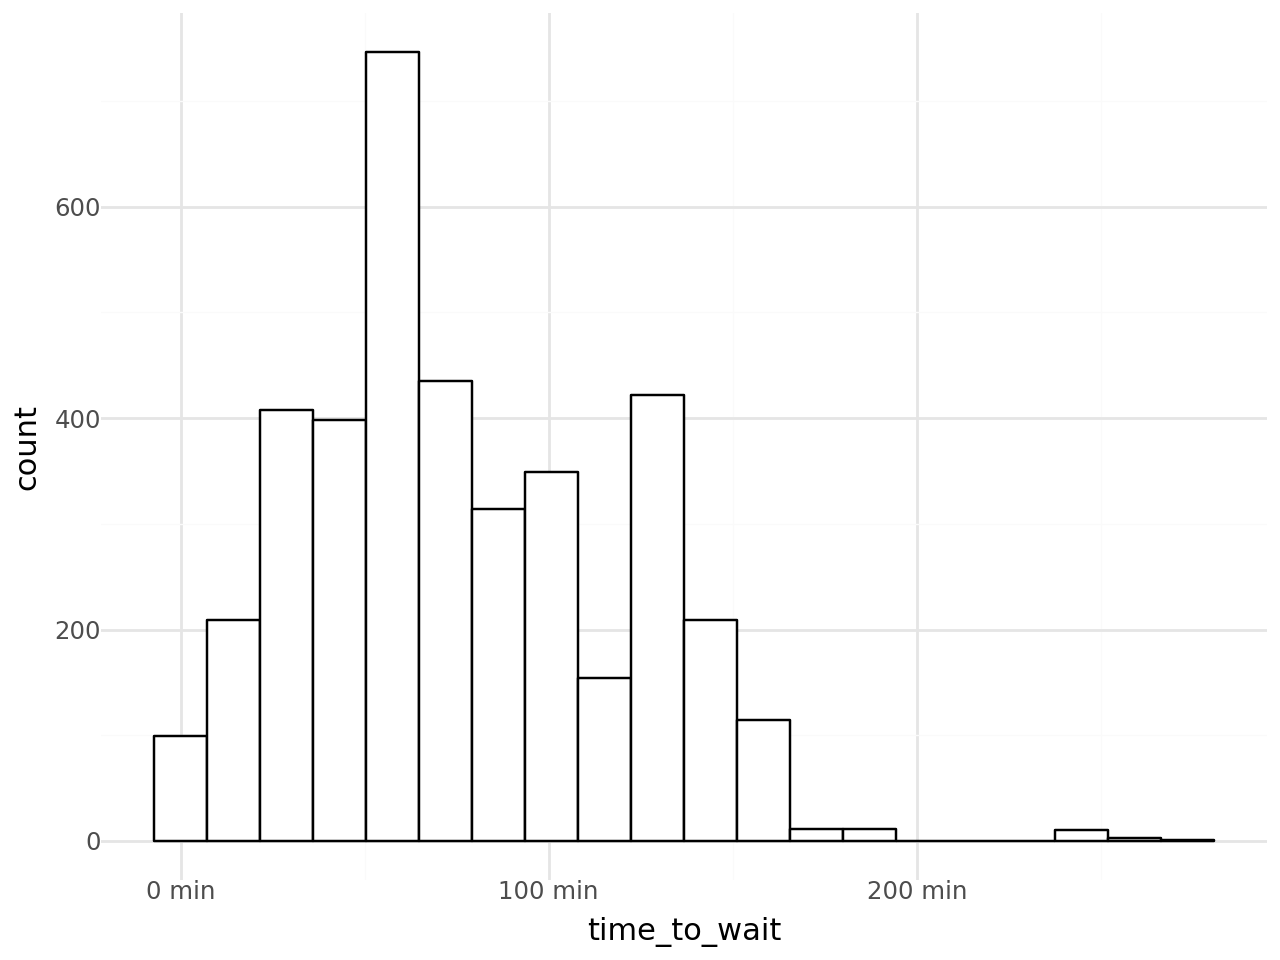

In [37]:
(
    rva_atl
    .join_asof(
        rva_atl,
        strategy="forward",
        on=c.time,
        allow_exact_matches=False,
        coalesce=False
    )
    .filter(c.day == c.day_right)
    .with_columns(
        time_to_wait = (c.time_right - c.time)
    )
    .pipe(ggplot, aes("time_to_wait"))
    + geom_histogram(binwidth=0.01, fill="white", color="black")
)